# This Jupyter notebook contains the instructions for Assessment 2019 for the module Fundamentals of Data Analysis 2019

GMIT H.Dip Data Analytics - Academic Year 2019 - 2020


##### Student: Henk Tjalsma


##### GMIT email address: G00376321@gmit.ie

## Problem statement

> This assessment concerns the well-known tips [6] dataset and the Python [1] packages seaborn [5] and jupyter [4]. The project is broken into three parts, as follows:

Description:

* Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment.
* Within the repository, create a jupyter [4] notebook that uses descriptive statistics and plots to describe the tips [6] dataset. 

Regression:

* To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount.

Analyse:

* Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those.

## Tips Dataset - what does it contain?

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule. [16]

##### Columns:

> total_bill : Total bill (cost of the meal), including tax, in US dollars

> tip : Tip (gratuity) in US dollars

> sex : Sex of person paying for the meal (0=male, 1=female)

> smoker : Smoker in party? (0=No, 1=Yes)

> day : 3=Thur, 4=Fri, 5=Sat, 6=Sun

> time : The time of the observation, whether at lunch or dinner etc.

> size : The size of the group whether there were multiple members (between 1 and 6)

In [1]:
# Import libraries
import pandas as pd
# import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Loading the .csv file into a Pandas DataFrame
tips = pd.read_csv('tips.csv', delimiter = ',')

In [3]:
# Showing content csv file
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Each entry or row captures a type of customer (be it male or female or smoker or non-smoker ) having either dinner or lunch on a particular day of the week. It also captures the amount of total bill, the tip given and the table size of a customer. [20]

## 1. Description:

* Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment.

* Within the repository, create a jupyter [4] notebook that uses descriptive statistics and plots to describe the tips [6] dataset. 

In [4]:
# Describing first 5 columns
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The tips.head command showed us that for this tips data set, the columns sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data. [17]

In [5]:
# Get the shape of the dataset - number of rows and columns
tips.shape

(244, 7)

In [6]:
# Describe the data (numbers) in the dataset
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The describe command allowed us to retrieve some common information such as min, max, unique and count for given numerical data.

* These are a few statistics that give some perspective on the nature of the distribution of the data [18]:
    - mean is the average and is the "expected" value of the distribution. On average, you'd expect to get this number.
    - std -> standard deviation -> it’s a measure of how far away from the mean values you’re typically are -> standard deviation is giving you sort of an indication of the spread away from the mean that those values are.    
    - 50% -> median, that is the value for which half of the values are above it, and half of them are below it.
    - 25% & 75% give perspective on the kurtosis. Also, all percentile numbers are generally more robust to outliers. 25% -> is the value for which 25% of the values in your data set, for the variable, are below that. 75% -> is the one for which 75% of the values in your data set, for the variable, are below it.
    - min, max, max - min, 75% - 25% are all alternatives to perspectives on how big of swings the data takes relative to the mean.
    - count, the larger this number, the more credibility all the stats have.

In [7]:
# Checking missing values (isnull method) in the tips dataset
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Univariate plots

These plots are based on a single variable and show the frequency of unique values of a given variable. In below example, there is just the total bill amount.

The “total_bill” variable appears skewed in nature and most of the bill values are in the range of 10 - 20 dollars.

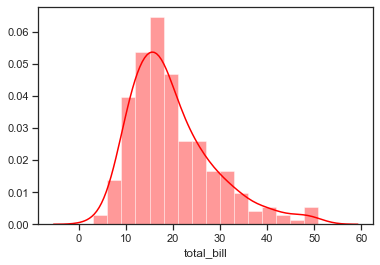

In [54]:
# Binsize is calculated using square-root of row count
sns.distplot(tips["total_bill"], bins=16, color="red")

##### Distplot

The sns.distplot() combines the histogram & plots the estimated probability density function over the data. The calculation of bin size is automatic here. 

It is applicable on numerical columns only as it creates histogram along with the plot of kernel density estimation. [26]

If you increase the number of bins, the more accurate the result will be.

##### Kernel Density Plot

KDE or kernel density or simply, density plot visualizes the distribution of data over a continuous interval or time period. The peaks of a Density Plot displays where exactly the values are concentrated over the interval. [28]

In below example, we see that most of the tips are between the range of 2 and 4.

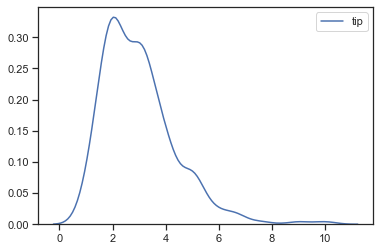

In [61]:
sns.kdeplot(tips['tip'])

Below example shows that for most visits to the restaurant, the size of the group was just 2. Followed by 3 and 4.

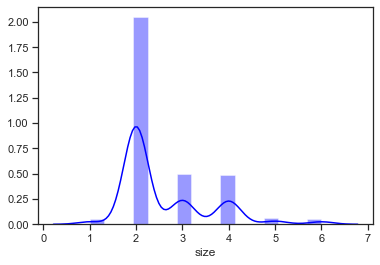

In [62]:
sns.distplot(tips["size"], bins=16, color="blue")

## 2. Regression:

* To the jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount.

In [12]:
# Checking missing values (isnull method) in the tips dataset
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

The above we already executed previously. This indicates that we have no missing tip values. So it seems all customers who were in this restaurant on each of those days Thursday till Sunday, left a tip amount when paying for the bill.

### Bivariate Plots

This type of plots is used when you need to find a relation between two variables and how the value of one variable changes the value of another variable. Different types of plots are used based on the data type of the variable.

##### Relplot

The relplot function provides access to several different axes-level functions that show the relationship between any two variables with semantic mappings of subsets.

The default plot type of relplot is scatterplot. It shows the relationship between two variables. So, if you need to find the correlation between two variables scatterplot can be used.

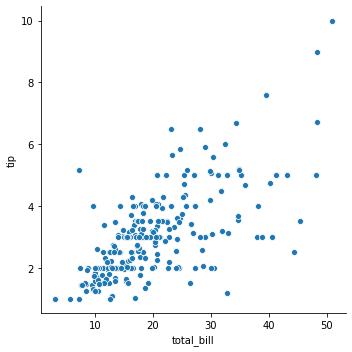

In [13]:
sns.relplot(x="total_bill", y="tip", data=tips);

Based on the above scatterplot there appears to be a strong correlation between the total bill & the tip amount. You can see there is a high concentration of tip data points around 10-20 bill payment, but the exact detail is missing. In below jointplot, it gives us a much better picture. 

##### Jointplot

A Jointplot takes two variables and creates Histogram and Scatterplot together. Normally the tip amount in any restaurant is dependant on the total bill/bill size.

- Jointplot :: kind =”hex”

The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. Also known as Hexbin Plots.

Now, in the plot image below, it is showing hexagons. The dark colour of the hexagons suggest high density of the data-points where the lighter colour signifies the lesser points.

We can see that if total bill is between 10–20 than the tip will be slightly below 2 dollars and up to 3-4 dollars.

The values that can be put into the kind parameter of the jointplot are as follows:

# kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }

For example:
sns.jointplot(x = tips["total_bill"], y = tips["tip"],kind = "kde", color="purple") # contour plot

A Contour plot (sometimes called Level Plots) are a way to show a three-dimensional surface on a two-dimensional plane. It graphs two predictor variables X Y on the y-axis and a response variable Z as contours.

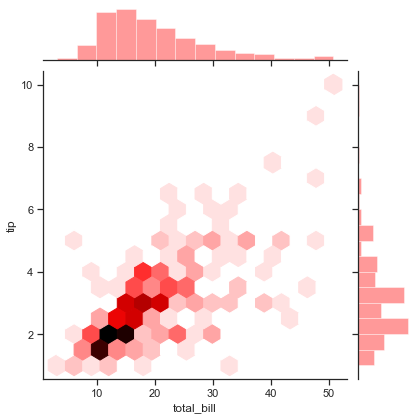

In [42]:
# In below the very dark region is the highest concentration
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex', color="red")

We can add a third variable also in scatterplot using different colors or shape of dots.

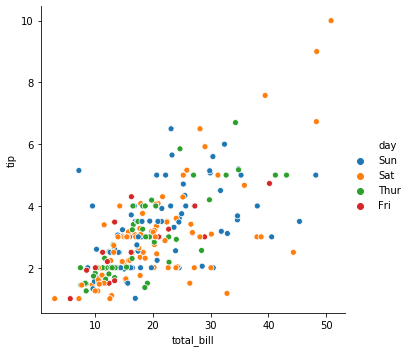

In [15]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips);

##### Plotting Correlation Matrix

The next plot shows you correlatations between the different variables of the dataset so the column values.

It's just an example, I describe it more indepth in section 3. For data scientists, checking correlations is an important part of the exploratory data analysis process. This analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning. [20]


<div class="alert alert-block alert-info">
<b>Note:</b> One important thing to note when plotting a correlation matrix is that it completely ignores any non-numeric column. 
</div>

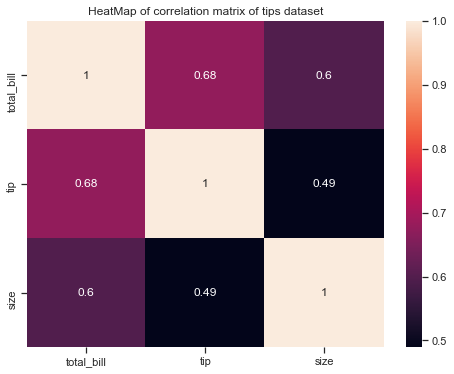

In [30]:
# Basic correlation matrix data frame - using the annotation argument
# Hitting bug - matplotlib/seaborn: first and last row cut in half of heatmap plot [see references 22 and 23]
# Downgrade the package to 3.1.0 (matplotlib broke heatmaps)
plt.subplots(figsize=(8,6))
plt.title("HeatMap of correlation matrix of tips dataset")
sns.heatmap(tips.corr(), annot=True)

While there is obviously a direct relationship between total_bill vs total_bill, tip vs tip, etc, all showing 1, below variables also show Correlation.

Variables With High Correlation:

    total_bill and tip -> 0.68

More evidence there is a strong relationship between total bill paid and tip amount given.

## 3. Analysis:

* Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those.

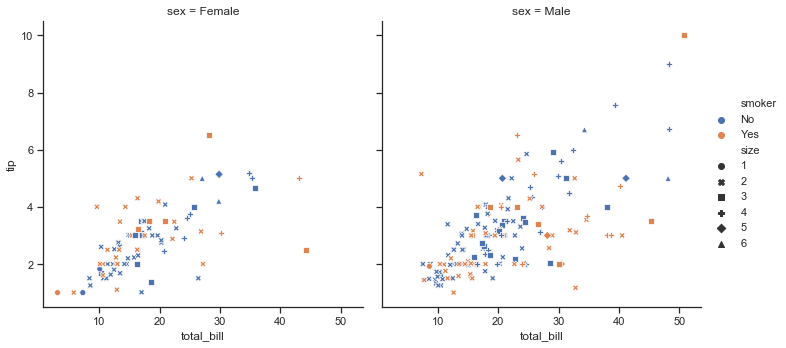

In [65]:
# Relation between tip and total bill for each gender, smoker and size.
sns.relplot(x="total_bill", y="tip", col="sex", hue="smoker", style="size", data=tips)

I find the above relational plot very unclear, simply too many variables.

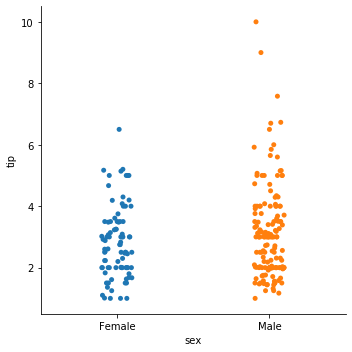

In [16]:
# Categorical data types - Scatterplot
sns.catplot(x="sex", y="tip", data=tips);

In above plot, we can see that most of the tips are concentrated between 2 and 4 irrespective of the gender.
However concentration data points males seems higher.

Different types of scatterplots can be made using attribute kind in seaborn.

The third variable can be used using attribute hue in seaborn.

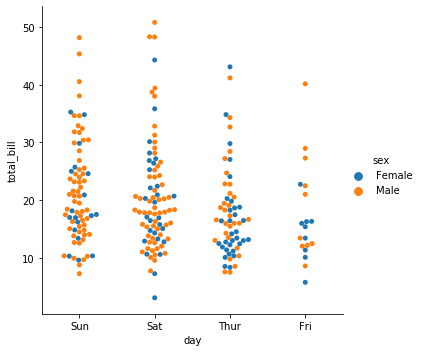

In [17]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

##### Catplot

In above plots, I'm showing the categorical plot. It shows the relationship between a numerical and one or more categorical variables in the data.

You can see high percentage data points men against total bill on Saturday and Sunday. For the other 2 days, Thursday for example the percentage seems higher for women, more blue datapoints. And for Friday it looks more like 50/50.

But when running below bar plots, the picture is much easier to interpret. 

* Tip Amount for Males is more than Females.

* And for all 4 weekdays, the total bill for men is higher than women.

##### Barplots

Barplots are meant for plotting categorical columns vs numerical columns. It creates bar in visualisation. 

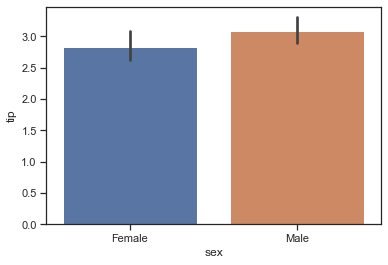

In [51]:
# Barplot
# Inference - Total Tip Amount for males is more than Females.

sns.barplot(x ="sex" , y ="tip" , data=tips)

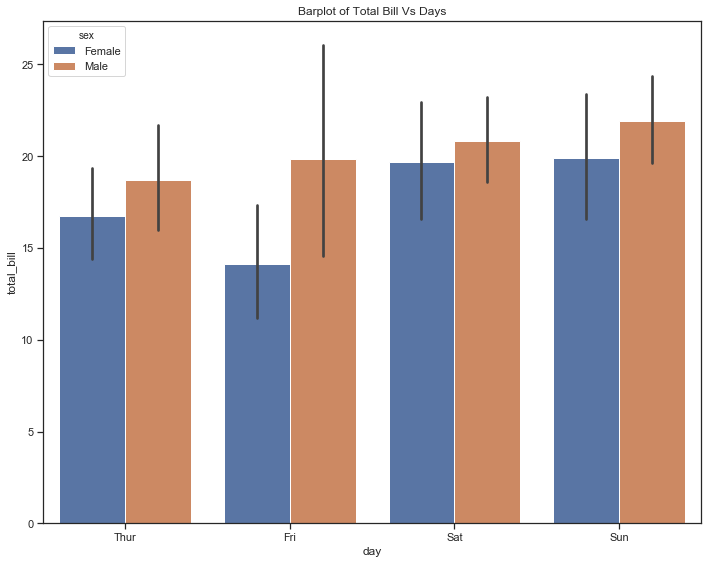

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(tips.day, tips.total_bill, order=["Thur", "Fri", "Sat", "Sun"], hue=tips.sex)
plt.title("Barplot of Total Bill Vs Days")

plt.tight_layout()
plt.show()

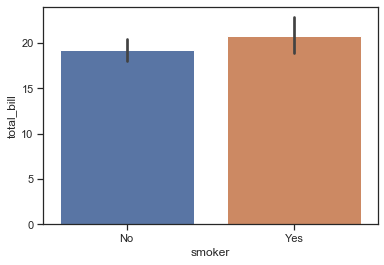

In [52]:
# Smoker Vs Total Bill
sns.barplot(x = "smoker", y = "total_bill", data =tips)

In above barplot I plotted Smoker versus Total Bill. The purpose is to find out if Smokers pay more bill than Non Smokers.

And yes that seems to be the case, more Bill for Smokers.

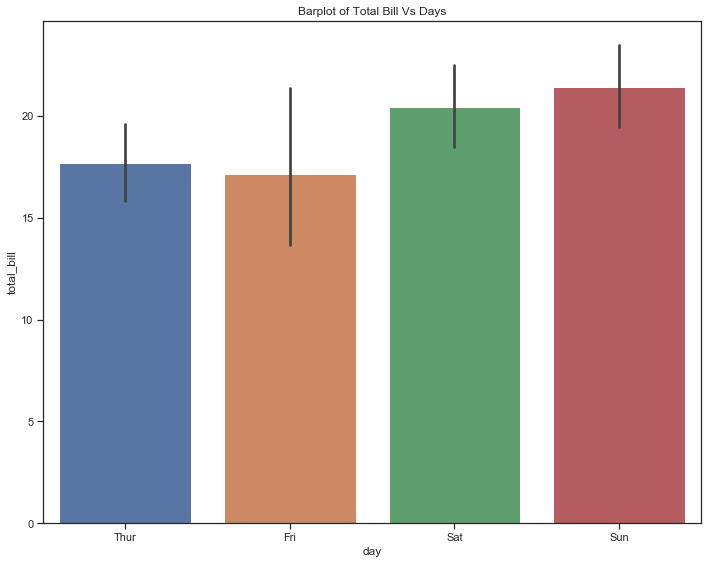

In [39]:
# Cross reference variables total bill versus days
# Lets find if there is more bill in Weekend or Weekdays
plt.figure(figsize=(10,8))
sns.barplot(tips.day, tips.total_bill, order=["Thur", "Fri", "Sat", "Sun"])
plt.title("Barplot of Total Bill Vs Days")

plt.tight_layout()
plt.show()

From the above barplot you can clearly see that the total bill is higher on Saturday and Sunday, compared to the other 2 days. People tend to visit more on weekends.

##### Line Plot

Draw a line plot with possibility of several semantic groupings.

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. [29]

In the below case, clearly, the tip increases with the increase in the size.

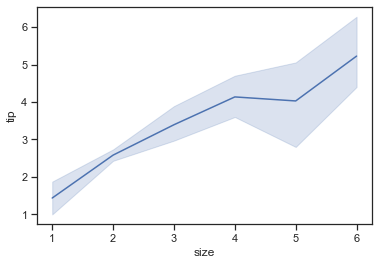

In [64]:
sns.lineplot(x="size", y="tip",data=tips)

##### Pairplot

A Pairplot essentially plots pair wise relationship between variables. It supports “hue” as coloring the plot using categorical variables.

In below example, the diagonal part shows the distplot or histogram with kernel density estimation. The upper and lower part of the Pairplot shows the scatterplot. The “hue” colours the plot using categorical columns.

hue = “sex” — It will color the plot gender wise.

palette = “Set2” is a type of color combination used to color the plot. More details about the palette can see be seen under the link:

https://seaborn.pydata.org/tutorial/color_palettes.html

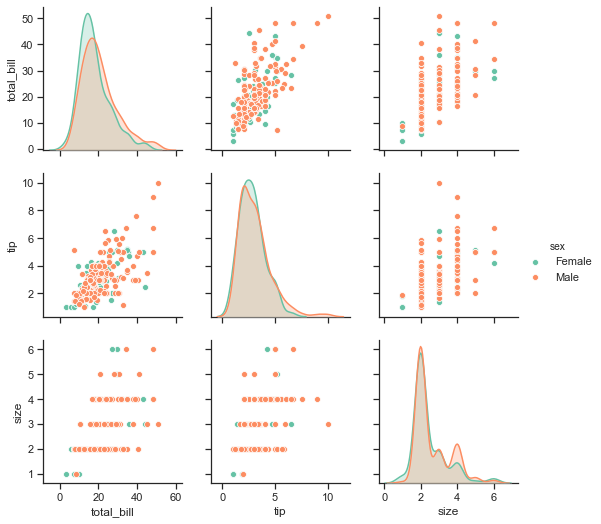

In [50]:
# Pairplot of Tips dataset
# This  will color the plot gender wise

sns.set(style="ticks")

sns.pairplot(tips, hue = "sex", palette="Set2")

##### Boxplot

Below I will mention some more types of plots you could use to analyze the Tips Dataset. I will not run actual code examples as such, and generate graphs.  

A Box Plot is a visual representation of five point summary statistics of a given data set. A five number summary includes:

    Minimum
    First Quartile
    Median (Second Quartile)
    Third Quartile
    Maximum
    
Also, a point worth noticing is that a boxplot is created for Categorical — Continuous Variables which means that if the x -axis is categorical and y axis is continuous then a boxplot or a violin plot should be created.

Below is boxplot of “day” & “total_bill” from the tips dataset:
* sns.boxplot(x = "day", y = "total_bill", data=tips)


![boxplot](boxplot.png)


Example Violinplot:
* sns.violinplot(x = "day", y = "total_bill", data = tips)


![violinplot](violinplot.png)


The violin plots are similar to the boxplots. The same can be seen in the image below.


![difference_boxplot_violinplot](difference_boxplot_violinplot.png)

##### LM Plot

The sns.lmplot is a plot that fits the regression line to the dataset showing as scatterplots. It follows the ordinary least square method and the line represents the best fit line. 

In below it shows the linear regression fit of total_bill variable for the different days as shown in the plot legend. This is obtained using hue = “day” in sns.lmplot.

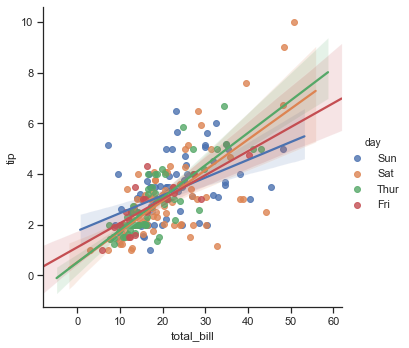

In [53]:
# LM PLot

sns.lmplot(x = "total_bill", y = "tip", data = tips, hue="day")

#### Plotting Correlation Matrix follow up - heatmap

For data scientists, checking correlations is an important part of the exploratory data analysis process. This analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning.

And because visualization is generally easier to understand than reading tabular data, heatmaps are typically used to visualize correlation matrices. A simple way to plot a heatmap in Python is by importing and implementing the Seaborn library. 

Seaborn heatmaps are appealing to the eyes, and they tend to send clear messages about data almost immediately. This is why this method for correlation matrix visualization is widely used by data analysts and data scientists alike.

But what else can we get from the heatmap apart from a simple plot of the correlation matrix?

In two words: A LOT.

Surprisingly, the Seaborn heatmap function has 18 arguments that can be used to customize a correlation matrix, improving how fast insights can be derived. [20]

The heat map provides a matrix-like plot used to plot the degree of correlation between multiple numerical columns. The heatmap() function of the Seaborn library is used to plot heatmaps. The heatmap() function accepts a dataframe with columns as well as row headers. The tips dataset only contains column headers. To create row headers, you can use the corr() function, which returns the dataset with both column and row headers. You can then use the heatmap() function to plot the heatmap for the dataset as shown below. [27]

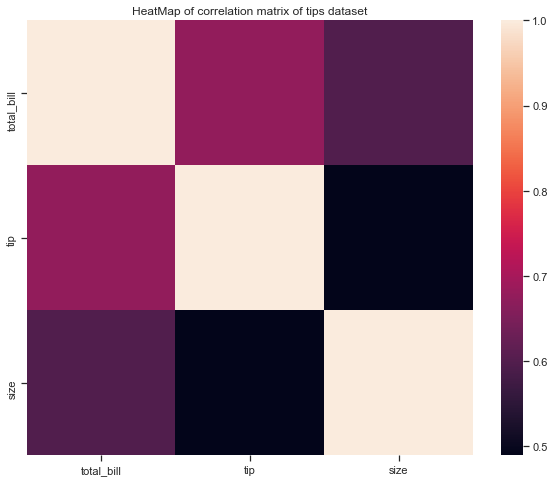

In [33]:
# Doing a basic correlation matrix of your data frame
# Hitting bug - matplotlib/seaborn: first and last row cut in half of heatmap plot [see references 22 and 23]
# Downgrade the package to 3.1.0 (matplotlib broke heatmaps)
plt.subplots(figsize=(10,8))
plt.title("HeatMap of correlation matrix of tips dataset")
sns.heatmap(tips.corr())

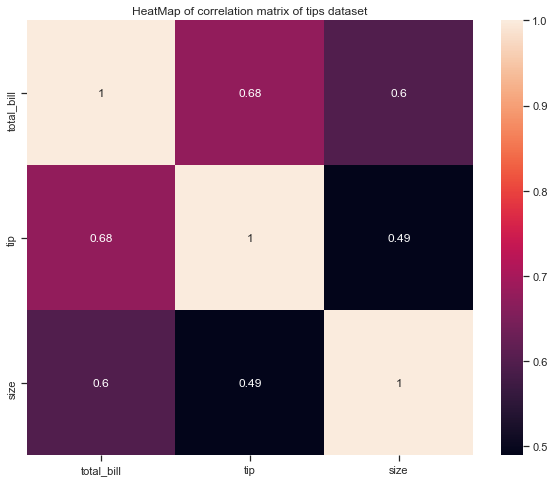

In [32]:
# And using the annotation argument
plt.subplots(figsize=(10,8))
plt.title("HeatMap of correlation matrix of tips dataset")
sns.heatmap(tips.corr(), annot=True)

While there is obviously a direct relationship between total_bill vs total_bill, tip vs tip, etc, all showing 1, below variables also show Correlation.

Variables With High Correlation:

    total_bill and tip -> 0.68

Variables With Medium Correlation:

    total_bill and size -> 0.6
    
Variables With Lower Correlation: 

    tip and size -> 0.49

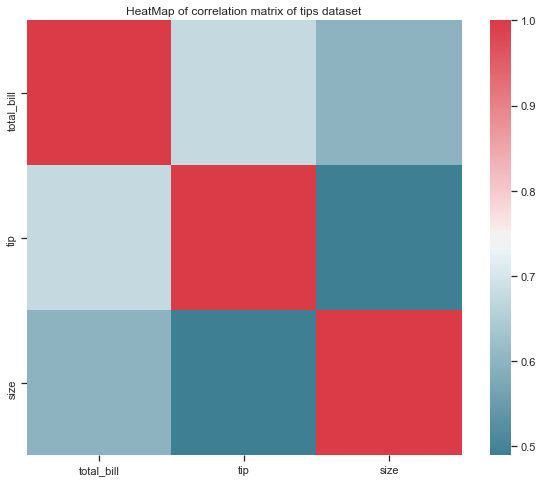

In [31]:
# Sns Heatmap [25] - another example
f, ax = plt.subplots(figsize=(10, 8))
corr = tips.corr()
plt.title("HeatMap of correlation matrix of tips dataset")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Finally I want to comment on this - Correlation Matrix:
    

<div class="alert alert-block alert-info">
<b>Note:</b> One important thing to note when plotting a correlation matrix is that it completely ignores any non-numeric column. 
</div>


You could change it, so that all the category variable were changed to numeric variables (after data wrangling the DataFrame will look like this, see below screenshot). It allows you to be even more detailed in your analysis. [24]

![data_wrangling](data_wrangling.png)


It requires Data Cleaning & Feature Engineering:

    Changing the data types
    Checking the categories to a dummy variable so as to get only numeric values

## References

[1] Python Software Foundation. Welcome to python.org.
https://www.python.org/.

[2] GMIT. Quality assurance framework.
https://www.gmit.ie/general/quality-assurance-framework.

[3] GitHub Guides. Mastering markdown.
https://guides.github.com/features/mastering-markdown/.

[4] Project Jupyter. Project jupyter.
https://jupyter.org/.

[5] Michael Waskom. seaborn.
https://seaborn.pydata.org/.

[6] Michael Waskom. Tips data set.
https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.

[7] Seaborn

https://anaconda.org/anaconda/seaborn

[8] Anaconda

https://docs.anaconda.com/anaconda/

[9] Python

https://www.python.org/downloads/

[10] Cmder software

https://cmder.net/

[11] https://stackoverflow.com/questions/30336324/seaborn-load-dataset

[12] https://stackoverflow.com/questions/43422692/loading-web-data-file-to-pandas-dataframe

[13] https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

[14] https://www.kaggle.com/ssouhassou/data-viz-a-modest-essay-on-the-dataset-tips

[15] https://www.kaggle.com/ranjeetjain3/different-types-of-charts

[16] https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

[17] https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

[18] https://stackoverflow.com/questions/36964155/what-is-the-statistical-significance-of-pandas-describe-function-and-how-to-use

[19] https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib

[20] https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

[21] https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger

[22]  https://datascience.stackexchange.com/questions/57245/seaborn-heatmap-not-displaying-correctly

[23] https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

[24] https://github.com/anitaokoh/Understanding-the-Seaborn-heatmap-function/blob/master/dissecting_heatmap.ipynb

[25] https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

[26] https://medium.com/@mukul.mschauhan/data-visualisation-using-seaborn-464b7c0e5122

[27] https://wellsr.com/python/seaborn-plots-for-python-data-visualization/

[28] https://analyticsindiamag.com/a-simple-introduction-to-pythons-seaborn-library/

[29] https://seaborn.pydata.org/generated/seaborn.lineplot.html